# Vector Data Analysis with GeoPandas

## Introduction

## Learning Objectives

## Core Concepts

### GeoDataFrame and GeoSeries

### Active Geometry Concept

## Installing GeoPandas

In [2]:
# %pip install geopandas pygis

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Creating GeoDataFrames

### Creating Points from Coordinate Data

In [4]:
# Creating a GeoDataFrame from coordinate data
data = {'City': ['Rexburg', 'Provo', 'Ephraim', 'Orderville'],
        'Latitude': [43.8630357275067, 40.24030556291218, 39.35624184316015, 37.27401474180931],
        'Longitude': [-111.83038528164005, -111.64974198670322, -111.58572870764212,  -112.87547776171053]}

# First create a regular pandas DataFrame
df = pd.DataFrame(data)

# Convert to GeoDataFrame by creating Point geometries from coordinates
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

City   Latitude   Longitude                     geometry
0     Rexburg  43.863036 -111.830385  POINT (-111.83039 43.86304)
1       Provo  40.240306 -111.649742  POINT (-111.64974 40.24031)
2     Ephraim  39.356242 -111.585729  POINT (-111.58573 39.35624)
3  Orderville  37.274015 -112.875478  POINT (-112.87548 37.27401)

## Reading and Writing Geospatial Data

### Understanding Geospatial File Formats

### Reading a GeoJSON File

In [5]:
url = "https://github.com/opengeos/datasets/releases/download/vector/nybb.geojson"
gdf = gpd.read_file(url)
gdf.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

### Writing Geospatial Data

In [6]:
output = 'nyc_boroughs.geojson'
gdf.to_file(output, driver='GeoJSON')
print(f'Data frame output to {output}')


Data frame output to nyc_boroughs.geojson


In [7]:
# Save as Shapefile (traditional GIS format)
output_file = "nyc_boroughs.shp"
gdf.to_file(output_file)

# Save as GeoPackage (modern, single-file format)
output_file = "nyc_boroughs.gpkg"
gdf.to_file(output_file, driver="GPKG")

/opt/conda/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1623819823.8099999 of field Shape_Area of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 3045212795.1999998 of field Shape_Area of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1937478507.6099999 of field Shape_Area of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 636471539.77400005 of field Shape_Area of feature 3 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.12/site-packages/pyogrio/raw.py:723: 

## Projections and Coordinate Reference Systems (CRS)

### Understanding Coordinate Systems

### Checking and Understanding CRS

In [8]:
print(f"Current CRS: {gdf.crs}")

Current CRS: EPSG:2263


### Reprojecting to Different Coordinate Systems

In [9]:
# Reproject to WGS84 (latitude/longitude) for global compatibility
gdf_4326 = gdf.to_crs(epsg=4326)
print(f"Reprojected CRS: {gdf_4326.crs}")
gdf_4326.head()

Reprojected CRS: EPSG:4326


BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

## Spatial Measurements and Analysis

### Preparing Data for Accurate Measurements

In [10]:
# Reproject to Web Mercator for accurate area calculations in square meters
gdf = gdf.to_crs("EPSG:3857")

# Set BoroName as index for easier data access
gdf = gdf.reset_index()
gdf = gdf.set_index("BoroName")
print(f"Now using CRS: {gdf.crs}")
print(gdf.head())


Now using CRS: EPSG:3857
               index  BoroCode     Shape_Leng    Shape_Area  \
BoroName                                                      
Staten Island      0         5  330470.010332  1.623820e+09   
Queens             1         4  896344.047763  3.045213e+09   
Brooklyn           2         3  741080.523166  1.937479e+09   
Manhattan          3         1  359299.096471  6.364715e+08   
Bronx              4         2  464392.991824  1.186925e+09   

                                                        geometry  
BoroName                                                          
Staten Island  MULTIPOLYGON (((-8243264.88 4948597.813, -8243...  
Queens         MULTIPOLYGON (((-8219461.955 4952778.645, -821...  
Brooklyn       MULTIPOLYGON (((-8222843.701 4950893.717, -822...  
Manhattan      MULTIPOLYGON (((-8238858.852 4965914.967, -823...  
Bronx          MULTIPOLYGON (((-8226155.114 4982269.852, -822...  


### Calculating Areas

In [11]:
# Calculate area in square meters
gdf["area"] = gdf.area

# Convert to more readable units (square kilometers)
gdf["area_km2"] = gdf["area"] / 1_000_000

# Display results sorted by area
gdf[["area", "area_km2"]].sort_values("area_km2", ascending=True)

area    area_km2
BoroName                               
Manhattan      1.032201e+08  103.220068
Bronx          1.929250e+08  192.925032
Staten Island  2.618039e+08  261.803854
Brooklyn       3.129684e+08  312.968357
Queens         4.928308e+08  492.830760

### Extracting Geometric Features

In [12]:
# Extract boundary lines from polygons
gdf["boundary"] = gdf.boundary

# Calculate centroids (geometric centers)
gdf["centroid"] = gdf.centroid

# Display the geometric features
gdf[["boundary", "centroid"]].head()

boundary  \
BoroName                                                           
Staten Island  MULTILINESTRING ((-8243264.88 4948597.813, -82...   
Queens         MULTILINESTRING ((-8219461.955 4952778.645, -8...   
Brooklyn       MULTILINESTRING ((-8222843.701 4950893.717, -8...   
Manhattan      MULTILINESTRING ((-8238858.852 4965914.967, -8...   
Bronx          MULTILINESTRING ((-8226155.114 4982269.852, -8...   

                                       centroid  
BoroName                                         
Staten Island  POINT (-8254713.581 4950718.033)  
Queens         POINT (-8217436.761 4969318.623)  
Brooklyn       POINT (-8231817.476 4960085.209)  
Manhattan      POINT (-8233984.776 4979551.696)  
Bronx          POINT (-8222783.625 4990631.161)

### Distance Calculations

In [13]:
# Use Manhattan's centroid as the reference point
manhattan_centroid = gdf.loc["Manhattan", "centroid"]

# Calculate distance from each borough centroid to Manhattan
gdf["distance_to_manhattan"] = gdf["centroid"].distance(manhattan_centroid)

# Convert to kilometers and display results
gdf["distance_to_manhattan_km"] = gdf["distance_to_manhattan"] / 1000

gdf[["distance_to_manhattan_km"]].sort_values("distance_to_manhattan_km")

distance_to_manhattan_km
BoroName                               
Manhattan                      0.000000
Bronx                         15.755010
Queens                        19.456427
Brooklyn                      19.586764
Staten Island                 35.511456

### Statistical Analysis of Spatial Data

In [14]:
# Calculate summary statistics
mean_distance = gdf["distance_to_manhattan_km"].mean()
max_distance = gdf["distance_to_manhattan_km"].max()
total_area = gdf["area_km2"].sum()

print(f"Mean distance to Manhattan: {mean_distance:.2f} km")
print(f"Maximum distance to Manhattan: {max_distance:.2f} km")
print(f"Total NYC area: {total_area:.2f} km²")

Mean distance to Manhattan: 18.06 km
Maximum distance to Manhattan: 35.51 km
Total NYC area: 1363.75 km²


## Visualizing Geospatial Data

### Setting Up Plotting Environment

In [15]:
import matplotlib.pyplot as plt

# Set high resolution for better quality plots
plt.rcParams["figure.dpi"] = 150

### Thematic Mapping

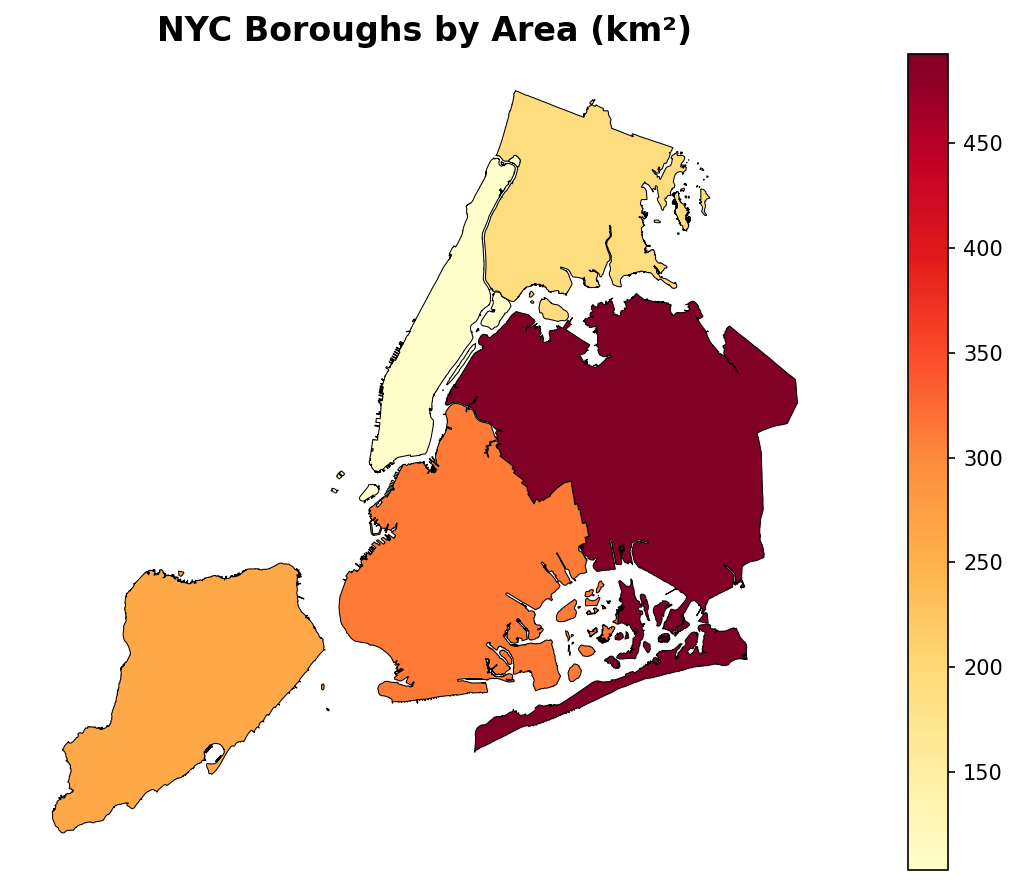

In [16]:
# Create a choropleth map showing borough areas
fig, ax = plt.subplots(figsize=(10, 6))

gdf.plot(
    column="area_km2",
    ax=ax,
    legend=True,
    cmap="YlOrRd",  # Yellow-Orange-Red colormap
    edgecolor="black",
    linewidth=0.5,
)

plt.title("NYC Boroughs by Area (km²)", fontsize=16, fontweight="bold")
plt.axis("off")  # Remove coordinate axes for cleaner appearance
plt.tight_layout()
plt.show()

### Multi-Layer Visualization

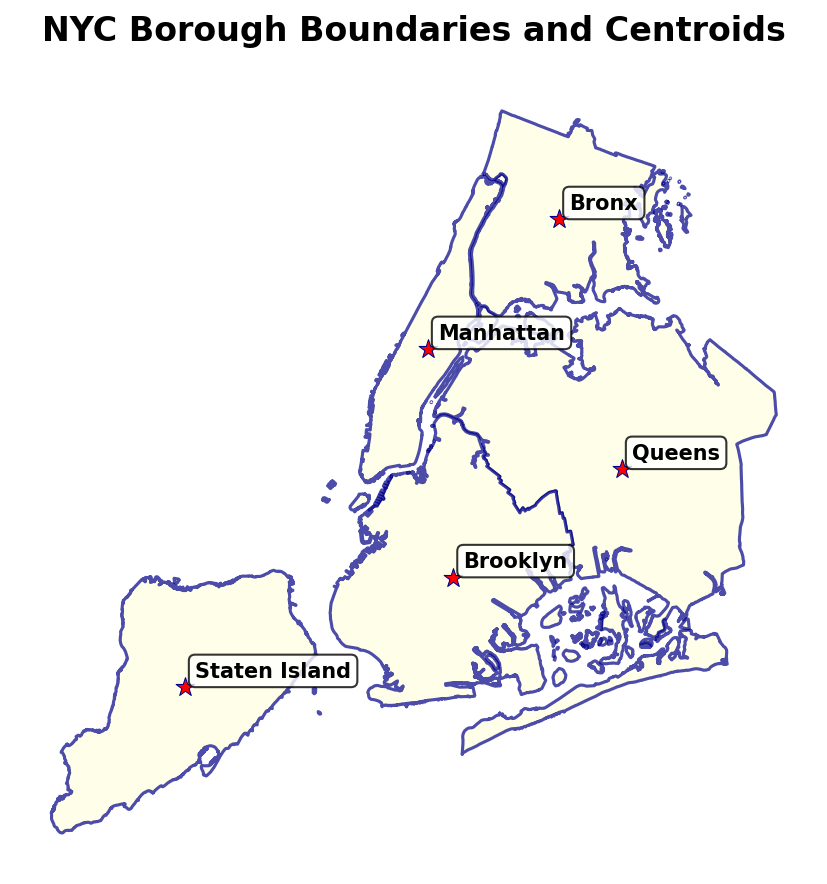

In [17]:
# Create a comprehensive map with multiple layers
fig, ax = plt.subplots(figsize=(10, 6))

# Plot borough boundaries as base layer
gdf["geometry"].plot(
    ax=ax, color="lightyellow", edgecolor="darkblue", linewidth=1.5, alpha=0.7
)

# Add centroids as point layer
gdf["centroid"].plot(
    ax=ax, color="red", marker='*', markersize=90, edgecolor="darkblue", linewidth=.5
)

# Add borough labels
for idx, row in gdf.iterrows():
    # Get centroid coordinates for label placement
    x = row.centroid.x
    y = row.centroid.y
    ax.annotate(
        idx,
        (x, y),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
    )

plt.title("NYC Borough Boundaries and Centroids", fontsize=16, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

### Interactive Visualization

In [18]:
# Create an interactive map using Folium integration
m = gdf.explore(
    column="area_km2",
    cmap="YlOrRd",
    tooltip=["area_km2", "distance_to_manhattan_km"],
    popup=True,
    legend=True,
)
m

## Advanced Geometric Operations

### Buffer Analysis

In [19]:
# Create 3-kilometer buffer zones around each borough
buffer_distance = 3000  # meters
gdf["buffered"] = gdf.buffer(buffer_distance)

print(f"Created {buffer_distance/1000} km buffer zones around each borough")

Created 3.0 km buffer zones around each borough


/tmp/ipykernel_660/2319111738.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")
/tmp/ipykernel_660/2319111738.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


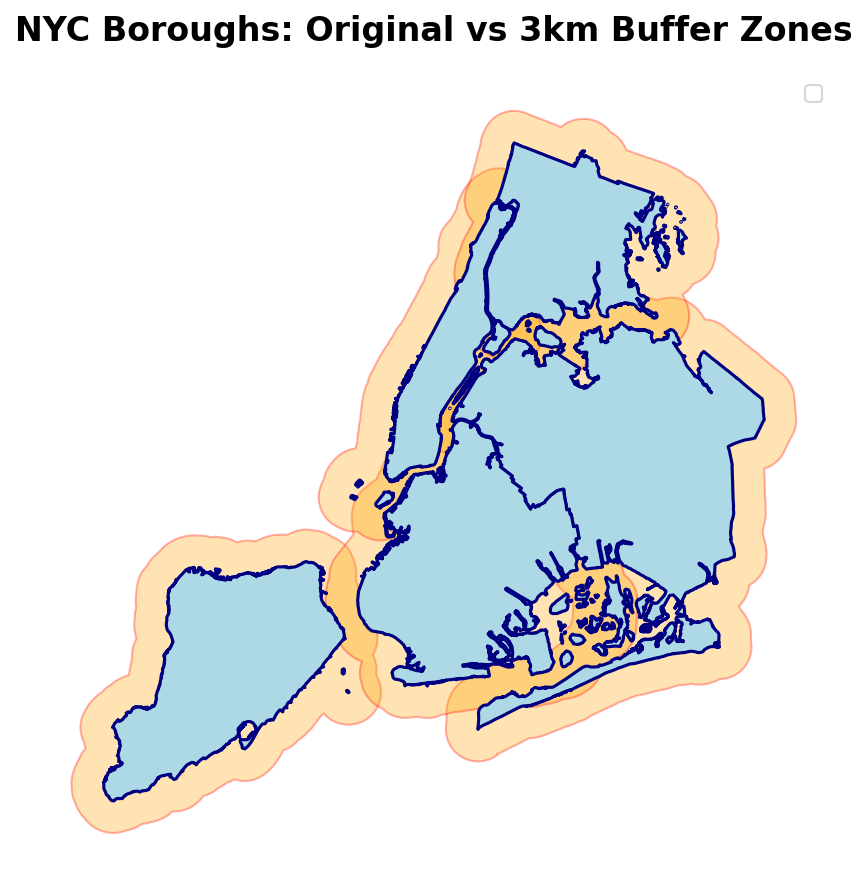

In [20]:
# Visualize original vs buffered geometries
fig, ax = plt.subplots(figsize=(10, 6))

# Plot buffered areas first (background)
gdf["buffered"].plot(
    ax=ax,
    alpha=0.3,
    color="orange",
    edgecolor="red",
    linewidth=1,
    label="3km Buffer Zone",
)

# Plot original geometries on top
gdf["geometry"].plot(
    ax=ax,
    color="lightblue",
    edgecolor="navy",
    linewidth=1.5,
    label="Original Boundaries",
)

plt.title("NYC Boroughs: Original vs 3km Buffer Zones", fontsize=16, fontweight="bold")
plt.legend(loc="upper right")
plt.axis("off")
plt.tight_layout()
plt.show()

### Convex Hull Analysis

In [21]:
# Calculate convex hulls for each borough
gdf["convex_hull"] = gdf.convex_hull

# Compare areas between original shapes and convex hulls
gdf["convex_hull_area"] = gdf["convex_hull"].area / 1_000_000  # Convert to km²
gdf["area_ratio"] = gdf["convex_hull_area"] / gdf["area_km2"]

print("Convex Hull Analysis:")
print(gdf[["area_km2", "convex_hull_area", "area_ratio"]].round(2))

Convex Hull Analysis:
               area_km2  convex_hull_area  area_ratio
BoroName                                             
Staten Island    261.80            332.55        1.27
Queens           492.83            845.79        1.72
Brooklyn         312.97            405.32        1.30
Manhattan        103.22            178.16        1.73
Bronx            192.93            269.55        1.40


/tmp/ipykernel_660/1795998761.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")
/tmp/ipykernel_660/1795998761.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


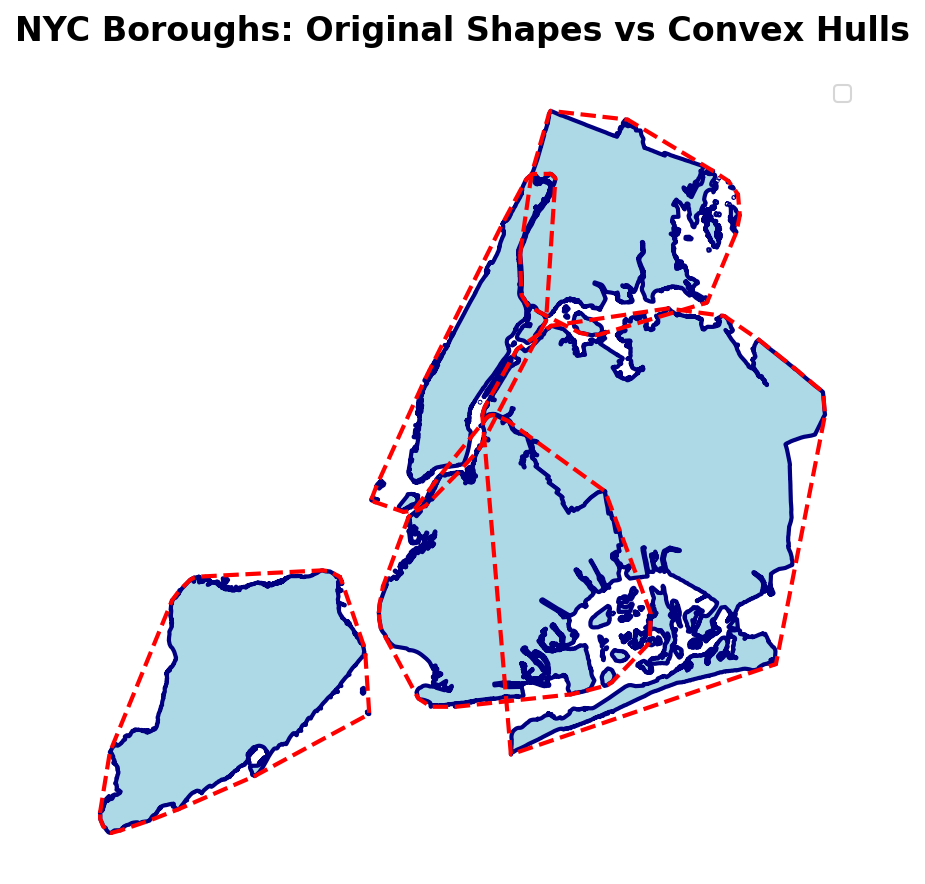

In [22]:
# Create comparison visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original geometries
gdf["geometry"].plot(
    ax=ax, color="lightblue", edgecolor="navy", linewidth=2, label="Original Shape"
)

# Plot convex hulls as outlines
gdf["convex_hull"].plot(
    ax=ax,
    facecolor="none",
    edgecolor="red",
    linewidth=2,
    linestyle="--",
    label="Convex Hull",
)

plt.title(
    "NYC Boroughs: Original Shapes vs Convex Hulls", fontsize=16, fontweight="bold"
)
plt.legend(loc="upper right")
plt.axis("off")
plt.tight_layout()
plt.show()

## Spatial Relationships and Queries

### Intersection Analysis

In [23]:
# Test which buffered boroughs intersect with Manhattan's original boundary
manhattan_geom = gdf.loc["Manhattan", "geometry"]

gdf["intersects_manhattan"] = gdf["buffered"].intersects(manhattan_geom)
gdf["touches_manhattan"] = gdf["geometry"].touches(manhattan_geom)

# Display results
intersection_results = gdf[["intersects_manhattan", "touches_manhattan"]]
intersection_results

intersects_manhattan  touches_manhattan
BoroName                                              
Staten Island                 False              False
Queens                         True               True
Brooklyn                       True               True
Manhattan                      True              False
Bronx                          True               True

### Containment and Spatial Validation

In [24]:
# Verify that centroids fall within their respective borough boundaries
gdf["centroid_within_borough"] = gdf["centroid"].within(gdf["geometry"])

# Check for any anomalies
anomalies = gdf[~gdf["centroid_within_borough"]]
if len(anomalies) > 0:
    print("Warning: Some centroids fall outside their borough boundaries")
    print(anomalies.index.tolist())
else:
    print("✓ All centroids correctly fall within their borough boundaries")

✓ All centroids correctly fall within their borough boundaries


## Best Practices and Performance Considerations

### Coordinate System Management

### Memory and Performance

### Data Validation

## Key Takeaways

## Exercises

### Exercise 1: Creating and Manipulating GeoDataFrames with GeoPandas

In [30]:
url =  'https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson'
gdf = gpd.read_file(url)
gdf.head()




fid  height_MS  height_FM  height_avg  SQMETERS STATEFP      NAME  \
0    2      15.05      23.30       19.18   6365.72      36  New York   
1    4      23.62      46.18       34.90   3287.84      36  New York   
2    5      19.98     109.60       64.79   2011.21      36  New York   
3    9      18.50      18.18       18.34   3110.32      36  New York   
4   34      21.53      32.84       27.18   5240.89      36  New York   

                                            geometry  
0  POLYGON ((-74.00129 40.71992, -74.00061 40.719...  
1  POLYGON ((-74.0032 40.71654, -74.00265 40.7163...  
2  POLYGON ((-74.01415 40.70324, -74.01342 40.703...  
3  POLYGON ((-73.98974 40.71924, -73.98924 40.720...  
4  POLYGON ((-74.00941 40.72351, -74.00816 40.723...

In [31]:

mean_height = gdf["height_MS"].mean()

print(f'The mean building height is {mean_height}')
n_gdf = gdf[gdf['height_MS'] > mean_height]
n_gdf.head()

output_file = 'tall_nyc_buildings.geojson'
n_gdf.to_file(output, driver='GeoJSON')


The mean building height is 15.454691136974038


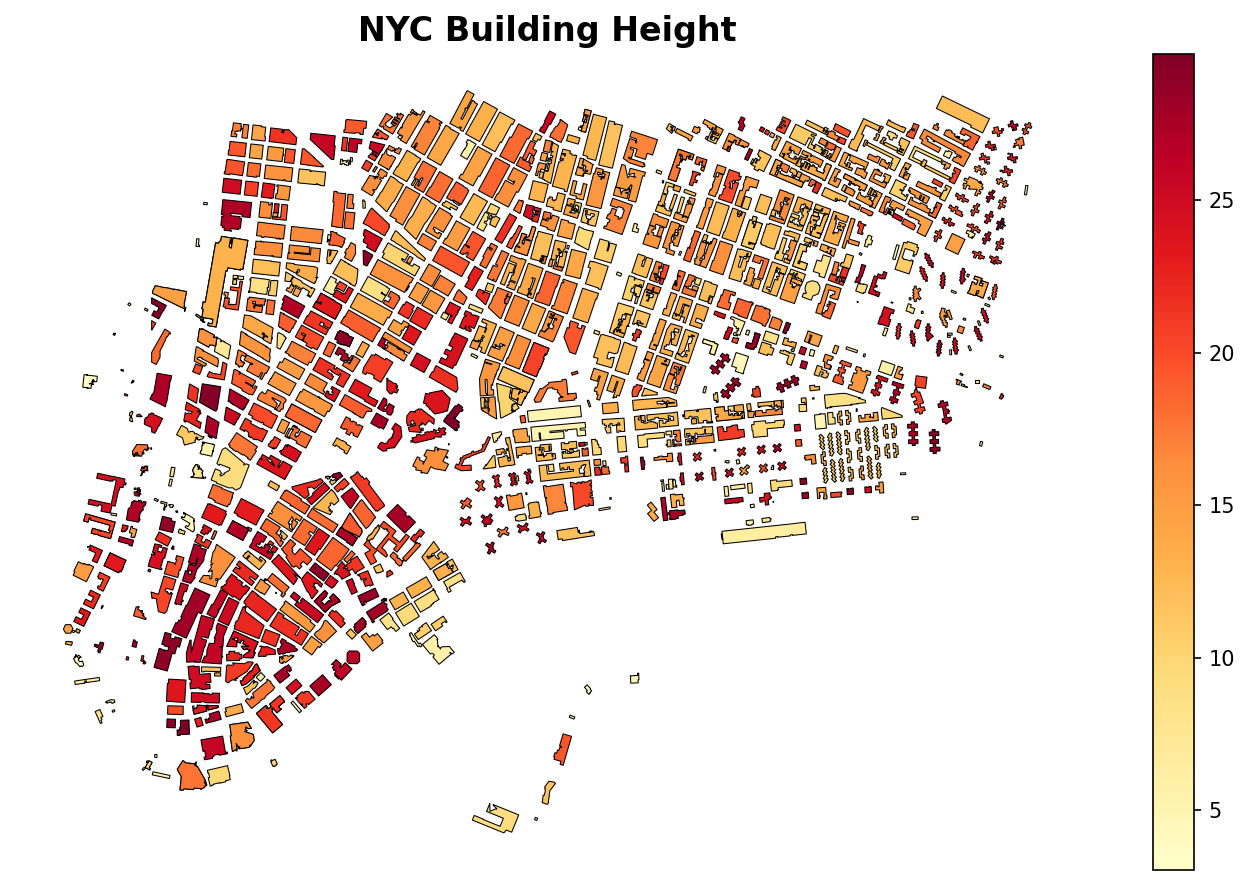

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

gdf.plot(
    column='height_MS',
    ax=ax,
    legend=True,
    cmap="YlOrRd",
    edgecolor='black',
    linewidth=.5
)

plt.title('NYC Building Height', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [33]:
m = gdf.explore(
    column="height_MS",
    cmap="YlOrRd",
    tooltip=["height_MS"],
    popup=True,
    legend=True,
)
m

### Exercise 2: Combining NumPy, Pandas, and GeoPandas

In [ ]:
url =  'https://github.com/opengeos/datasets/releases/download/world/world_cities.csv'
gdf = gpd.read_file(url)
gdf.head()



id         name country latitude longitude population
0  1        Bombo     UGA   0.5833   32.5333      75000
1  2  Fort Portal     UGA    0.671    30.275      42670
2  3      Potenza     ITA   40.642    15.799      69060
3  4   Campobasso     ITA   41.563    14.656      50762
4  5        Aosta     ITA   45.737     7.315      34062